In [1]:
from block_id import find_blocks
import numpy as np

L=[0,0,1,1,1,0,0]
a=np.array(L)

In [2]:
find_blocks(1,a)

array([[2, 5]])

In [1]:
import h5py
import numpy as np

with h5py.File('3960_55663.h5', 'r') as f:
    arr0 = f['flux']
    print(arr0.shape)
    flux = arr0[:]

    arr1 = f['loglam']
    print(arr1.shape)
    loglam = arr1[:]
    
    arr2 = f['zans']
    zans = arr2[:]
    
    arr3 = f['info']
    x = arr3.attrs['plate']
    
    
    
    
    

(512, 4667)
(4667,)


In [3]:
zans.shape

(512,)

In [6]:
10**(loglam)

array([ 3551.40334983,  3552.22118482,  3553.03920815, ...,
       10394.41375149, 10396.80742928, 10399.20165829])

In [5]:
loglam[1]-loglam[0]

0.00010000000000021103

In [8]:
dloglam = 1e-4*np.log(10)
print(dloglam)

0.0002302585092994046


In [11]:
1/dloglam

4342.944819032517

In [ ]:
#dlam = wave * 1.0e-4 * np.log(10.0)

In [4]:
flux.shape

(512, 4667)

In [54]:
idd=[0,1,2,3,4,5,6]
[zans[i][-9] for i in idd]

[0.68766606,
 0.48894334,
 0.5383572,
 0.68320936,
 0.7065783,
 0.5369264,
 0.50569266]

In [14]:
flux.shape

(512, 4667)

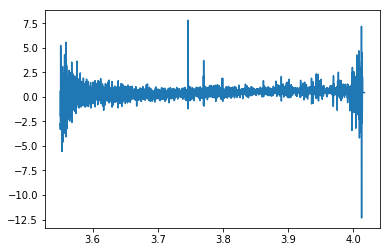

In [15]:
from matplotlib import pyplot as plt
plt.plot(loglam,flux[0,:])

In [3]:
a

array([0, 0, 1, 1, 1, 0, 0])

In [7]:
type(np.argmax(a))

numpy.int64

In [9]:
xp = [1, 2, 3]
fp = [3, 2, 0]
np.interp(2.5, xp, fp)

1.0

In [10]:
np.interp([0, 1, 1.5, 2.72, 3.14], xp, fp)

array([3.  , 3.  , 2.5 , 0.56, 0.  ])

In [11]:
a

array([0, 0, 1, 1, 1, 0, 0])

In [14]:
np.concatenate((a,a))

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [15]:
b=np.arange(4).reshape(2,2)

In [16]:
b

array([[0, 1],
       [2, 3]])

In [17]:
np.concatenate((b,b),axis=0)

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [1]:
with h5py.File('3960_55663.h5', 'r') as f:
    arr0 = f['flux']
    print(arr0.shape)
    flux = arr0[:]

    arr1 = f['loglam']
    print(arr1.shape)
    loglam = arr1[:]
    
    arr2 = f['zans']
    zans = arr2[:]
    
    arr3 = f['newsynflux']
    synflux = arr3[:]
    
    arr4 = f['res_ivar']
    res_ivar = arr4[:]
    

NameError: name 'h5py' is not defined

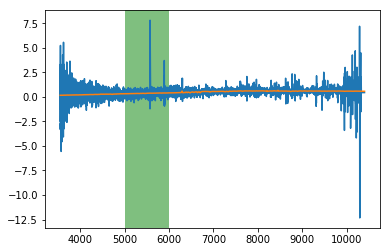

In [62]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(10**loglam,flux[0,:])
ax.plot(10**loglam,synflux[0,:])
ax.axvspan(5000, 6000, facecolor='g', alpha=0.5)
plt.show()

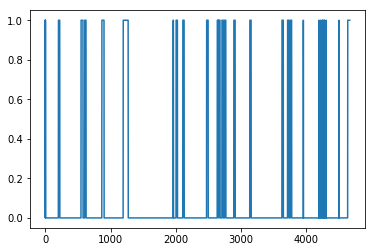

In [69]:
plt.plot(np.equal(res_ivar[0,:],0))

In [68]:
res_ivar.shape

(512, 4667)

In [73]:
from block_id import find_blocks
import numpy as np
id_mask = []
mask = np.zeros(res_ivar.shape)
for i in range(mask.shape[0]):
    mask[i,:] = np.equal(res_ivar[0,:],0)
    id_mask.append(find_blocks(1,mask[i,:] ))


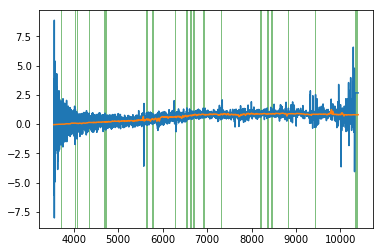

In [82]:
wave =10**loglam
spec_id = 56
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(wave,flux[spec_id,:])
ax.plot(wave,synflux[spec_id,:])
for ind in id_mask[spec_id]:
    id_low = ind[0]
    id_high = ind[1]
    if id_high >= wave.size:
        id_high = -1
    ax.axvspan(wave[id_low], wave[id_high], facecolor='g', alpha=0.5)
plt.show()

In [1]:
from utils import findhits_lya
import h5py
import numpy as np

with h5py.File('3960_55663.h5', 'r') as f:
    arr0 = f['flux']
    print(arr0.shape)
    flux = arr0[:]

    arr1 = f['loglam']
    print(arr1.shape)
    loglam = arr1[:]
    
    arr2 = f['zans']
    zans = arr2[:]
    
    arr3 = f['newsynflux']
    synflux = arr3[:]
    
    arr4 = f['res_ivar']
    res_ivar = arr4[:]

(512, 4667)
(4667,)


In [2]:
flux

array([[-2.7587361 , -2.7585819 , -3.0372741 , ...,  0.44212165,
         0.44213632,  0.44215095],
       [-1.1408206 , -1.1407437 ,  0.06107678, ...,  2.6173046 ,
         2.617388  ,  2.617471  ],
       [-5.225991  , -5.225694  , -2.8209817 , ...,  3.2300143 ,
         3.230121  ,  3.230228  ],
       ...,
       [-4.16861   , -4.1681037 , -4.167598  , ...,  1.8099587 ,
         0.6452954 ,  0.64530367],
       [ 0.44346735,  0.4434134 ,  0.44335955, ...,  0.9273812 ,
         0.41544116,  0.4154465 ],
       [ 0.42403668,  0.42400172,  0.42396685, ...,  0.4462734 ,
         3.1735733 ,  3.1736286 ]], dtype=float32)

In [2]:
res = findhits_lya(resflux=flux-synflux,resivar=res_ivar,zans=zans,wave=10**loglam)

In [3]:
res

{'fakesn': array([[ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932]]),
 'fiber_hits': array([195, 695]),
 'mjd_hits': array([111, 111], dtype=int8),
 'peak_id': array([370, 696]),
 'peak_sn': array([6.23691709, 7.10261043]),
 'peak_sn_array': array([[ 1.22627539,  1.18168433,  1.09895777,  1.04515986,  1.10110737,
          1.31768029,  1.6705888 ,  2.07980336,  2.47621826,  2.85066832,
          3.25439923,  3.7432707 ,  4.31769695,  4.94551578,  5.60362667,
          6.23691709,  6.70621235,  6.84968038,  6.62182083,  6.11947494,
          5.48259753,  4.77560774,  4.02614499,  3.26263566,  2.51678589,
          1.85014768,  1.36214168,  1.10650135,  1.03071734,  1.0046843 ,
          0.89312684],
        [-1.6972547 , -1.2537988 , -0.69422403, -0.17646297,  0.22506906,
          0.54550816,  0.84751208,  1.15607471,  1.43056086,  1.63773941,
          1.82860774,  2.11896591,  2.66254262,  3.60948129,  5.08994248,
          7.10261043,  9.36340

In [4]:
res

{'fakesn': array([[ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932]]),
 'fiber_hits': array([195, 695]),
 'mjd_hits': array([111, 111], dtype=int8),
 'peak_id': array([370, 696]),
 'peak_sn': array([6.23691709, 7.10261043]),
 'peak_wave': array([3867.22998119, 4168.6938347 ]),
 'plate_hits': array([3960, 3960]),
 'spec_id': array([ 91, 346]),
 'z_hits': array([0.21616927, 0.59874481])}

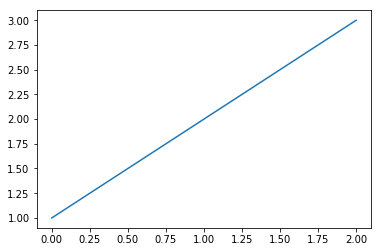

In [4]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
ax.plot([1,2,3])
fig.savefig('1.png')

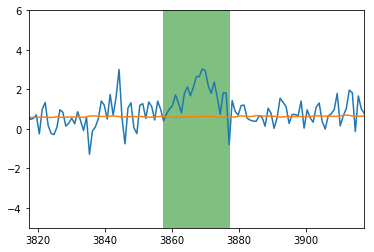

In [4]:
from matplotlib import pyplot as plt
id_hit = 0
spec_id = res['spec_id'][id_hit]
wave =10**loglam
spec_id = 91
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(wave,flux[spec_id,:])
ax.plot(wave,synflux[spec_id,:])
ax.axvspan(res['peak_wave'][id_hit]-10, res['peak_wave'][id_hit]+10, facecolor='g', alpha=0.5)
#ax.set_xlim(3700,4800)
ax.set_xlim(res['peak_wave'][id_hit]-50,res['peak_wave'][id_hit]+50)
ax.set_ylim(-5,6)
plt.show()

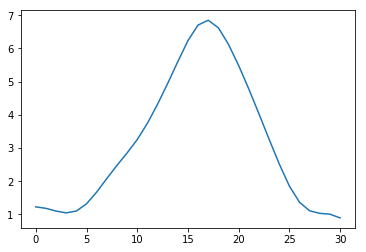

In [10]:
from matplotlib import pyplot as plt
id_hit = 0
spec_id = res['spec_id'][id_hit]
wave =10**loglam
spec_id = 91
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(res['peak_sn_array'][id_hit])
#ax.axvspan(res['peak_wave'][id_hit]-10, res['peak_wave'][id_hit]+10, facecolor='g', alpha=0.5)
#ax.set_xlim(3700,4800)
#ax.set_xlim(res['peak_wave'][id_hit]-50,res['peak_wave'][id_hit]+50)
#ax.set_ylim(-5,6)
plt.show()

In [3]:
from utils import search_hits
from utils import concatenate_dict
res = search_hits('3960_55663.h5')

In [2]:
res

{'fakesn': array([[ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932]]),
 'fiber_hits': array([195, 695]),
 'mjd_hits': array([111, 111], dtype=int8),
 'peak_id': array([370, 696]),
 'peak_sn': array([6.23691709, 7.10261043]),
 'peak_wave': array([3867.22998119, 4168.6938347 ]),
 'plate_hits': array([3960, 3960]),
 'spec_id': array([ 91, 346]),
 'z_hits': array([0.21616927, 0.59874481])}

In [4]:
concatenate_dict(res,res)

{'fakesn': array([[ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932],
        [ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932]]),
 'fiber_hits': array([195, 695, 195, 695]),
 'mjd_hits': array([111, 111, 111, 111], dtype=int8),
 'peak_id': array([370, 696, 370, 696]),
 'peak_sn': array([6.23691709, 7.10261043, 6.23691709, 7.10261043]),
 'peak_wave': array([3867.22998119, 4168.6938347 , 3867.22998119, 4168.6938347 ]),
 'plate_hits': array([3960, 3960, 3960, 3960]),
 'spec_id': array([ 91, 346,  91, 346]),
 'z_hits': array([0.21616927, 0.59874481, 0.21616927, 0.59874481])}

In [38]:
isinstance([1,2]+[1,2],list)

True

In [6]:
import numpy as np
bb= np.arange(6).reshape(2,3)

In [8]:
np.concatenate((bb,bb))

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [17]:
cc= {'1':1,'2':2,'3':3}
dd= {'1':'ss','2':'dsdd','3':'qqq'}

In [18]:
cc

{'1': 1, '2': 2, '3': 3}

In [22]:
for key in cc:
    print(cc[key],dd[key])

(1, 'ss')
(3, 'qqq')
(2, 'dsdd')


In [16]:
dd

{'1': 'ss', '2': 'dsdd'}

In [ ]:
dd[]

In [24]:
if dd:
    print('----')

----


In [31]:
isinstance(dd,dict)

True

In [35]:
import numpy as np
a=np.arange(3)

In [36]:
isinstance(a,np.ndarray)

True

In [39]:
res

{'fakesn': array([[ 0.43039551,  0.71942622, -0.19851046],
        [ 1.6056978 , -0.36712903,  0.36221932]]),
 'fiber_hits': array([195, 695]),
 'mjd_hits': array([111, 111], dtype=int8),
 'peak_id': array([370, 696]),
 'peak_sn': array([6.23691709, 7.10261043]),
 'peak_wave': array([3867.22998119, 4168.6938347 ]),
 'plate_hits': array([3960, 3960]),
 'spec_id': array([ 91, 346]),
 'z_hits': array([0.21616927, 0.59874481])}

In [17]:
import numpy as np
from scipy.signal import medfilt
#a=np.arange(10)
a=np.random.rand(5)*10
print(a)
print(medfilt(a,3))
#in idl, the 0 and -1 elemetns of medfilt(a,3) is equal to a's elements

[9.26189853 2.3516537  4.00064634 3.08511306 9.45539062]
[2.3516537  4.00064634 3.08511306 4.00064634 3.08511306]


In [18]:
fn = '/data/inspur_disk03/userdir/caoxy/eboss_lya/data/2/5017_55715.h5'
#from utils import findhits_lya
import h5py
import numpy as np

with h5py.File(fn, 'r') as f:
    arr0 = f['flux']
    print(arr0.shape)
    flux = arr0[:]

    arr1 = f['loglam']
    print(arr1.shape)
    loglam = arr1[:]
    
    arr2 = f['zans']
    zans = arr2[:]
    
    arr3 = f['newsynflux']
    synflux = arr3[:]
    
    arr4 = f['res_ivar']
    res_ivar = arr4[:] 

(4660,)
(4660,)


In [19]:
flux.shape

(4660,)

In [20]:
loglam.shape

(4660,)

In [21]:
zans.shape

(1,)

In [16]:
synflux.shape

(4660,)

In [1]:
import utils as ul

In [3]:
ul.convert_dpix_to_vdisp(0.5)

34.53877639491069